In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [202]:
raw_data = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', index_col=0,
                       parse_dates=[[0,1]], infer_datetime_format=True, dayfirst=True)

In [204]:
for i in range(raw_data.shape[1]):
    bad_cnt = raw_data.iloc[:, i].isnull().sum()
    print('Column %d has %d bad values.' % (i, bad_cnt))

Column 0 has 25979 bad values.
Column 1 has 25979 bad values.
Column 2 has 25979 bad values.
Column 3 has 25979 bad values.
Column 4 has 25979 bad values.
Column 5 has 25979 bad values.
Column 6 has 25979 bad values.


In [77]:
print(raw_data.shape)
# print(raw_data.iloc[4,[2,3,6,7,8]])
print(raw_data)

(2075259, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
Date_Time                                                                  
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

In [ ]:
# for i in range(raw_data.shape[0]):
#     for k in range(2, raw_data.shape[1]):
#         if (raw_data.iloc[i, k].isnull()):
#             print('true')
# print(raw_data)
# print(raw_data.loc[raw_data['Global_active_power'].isnull()])
print(type(raw_data.iloc[0]))
# print(type(raw_data.il[0]))
# if (raw_data.iloc[0].isnull()):
#     print('is null')
# print(raw_data.iloc[0].isnull())

for col in range(raw_data.shape[1]):
    count_nan = raw_data.iloc[:,col].isnull().sum()
    last_val = raw_data.iloc[0, col]
    for row in range(raw_data.shape[0]):
#         if (pd.isnull(val)):
#             print('found null')
        idx = row + 1
        while(pd.isnull(raw_data.iloc[row, col])):
            temp = raw_data.iloc[idx, col]
            if (not pd.isnull(temp)):
                raw_data.iloc[row, col] = (last_val + temp) / 2
            idx += 1
        if (row == 0):
            print('Out of while')
            
#     count_nan = 0
    print('Column %s has %d missing values' % (raw_data.iloc[:,i].name, count_nan))

# for i, v in enumerate(raw_data.iloc[0:10,1]):
#     print('Index %d = %f' % (i, v))

# print(raw_data.iloc[0, 1])
# if (pd.isnull(raw_data.iloc[0, 1])):
#     print('is nan')

In [130]:
for col in raw_data.columns:
#     print(col)
    count_nan = 0
#     count_nan = raw_data[col].isnull().sum()
    last_val = raw_data[col].iloc[0]
#     print(last_val)
    for row, val in enumerate(raw_data[col]):
#         if (pd.isnull(val)):
#             # Find next good value
#             idx = row + 1
#             while (pd.isnull(raw_data[col].iloc[idx])):
#                 idx = idx + 1
# #             print('out of while')
#             new_val = (last_val + raw_data[col].iloc[idx]) / 2
#             raw_data[col].iloc[row] = new_val
#         last_val = raw_data[col].iloc[row]
# #     count_nan = 0
    print('Column %s has %d missing values' % (raw_data[col].name, count_nan))
    break


KeyboardInterrupt: 

In [270]:
foo = raw_data.iloc[:,0].isnull()
print(type(foo.values))
print(foo.values)
bar = np.where(foo.values == True)
print(type(bar))
print(bar[0])
print(len(bar[0]))
print(raw_data.iloc[:,0].isnull().sum())
print(raw_data.iloc[6839, 0])
print(bar[0][-2:])

<class 'numpy.ndarray'>
[False False False ... False False False]
<class 'tuple'>
[   6839    6840   19724 ... 1990187 1990188 2027411]
25979
25979
nan
[1990188 2027411]


In [268]:
filled_data = raw_data.copy()

for col in range(1):#filled_data.shape[1]):
#     next_good = 0.0
#     last_good = 0.0
    last_row = -2
    
    null_series = filled_data.iloc[:, col].isnull()
    null_indices = np.where(null_series.values == True)[0].tolist()
    print(type(null_indices))
    skip_cnt = 0
    for i in range(len(null_indices)):
        row = null_indices[i]
        
        if (last_row == row - 1):
            new_val = (last_good + next_good) / 2
            filled_data.iloc[row] = new_val
            last_good = new_val
            continue
            
        if (i == len(null_indices) - 1):
            # This is the last null value in the column. The next row is good.
            filled_data.iloc[row] = (filled_data.iloc[row - 1] + filled_data.iloc[row + 1]) / 2
        else:
            good_idx = 0
            for k in range(i, len(null_indices)):
                if (null_indices[k] != null_indices[k + 1] - 1):
                    good_idx = k
                    break
                elif (k == len(null_indices) - 1):
                    good_idx = k
            next_good = filled_data.iloc[null_indices[good_idx] + 1]
            last_good = filled_data.iloc[row - 1]
            new_val = (last_good + next_good) / 2
            filled_data.iloc[row] = new_val
            last_good = new_val
            last_row = row
                
    print('Column %d cleaned' % col)

<class 'list'>
Column 0 cleaned


In [277]:
print(raw_data.iloc[6838])
print(filled_data.iloc[6839])
print(filled_data.iloc[6840])
print(raw_data.iloc[6841])

Global_active_power        0.244
Global_reactive_power      0.000
Voltage                  242.290
Global_intensity           1.000
Sub_metering_1             0.000
Sub_metering_2             0.000
Sub_metering_3             0.000
Name: 2006-12-21 11:22:00, dtype: float64
Global_active_power        0.245
Global_reactive_power      0.000
Voltage                  242.015
Global_intensity           1.000
Sub_metering_1             0.000
Sub_metering_2             0.000
Sub_metering_3             0.000
Name: 2006-12-21 11:23:00, dtype: float64
Global_active_power        0.2455
Global_reactive_power      0.0000
Voltage                  241.8775
Global_intensity           1.0000
Sub_metering_1             0.0000
Sub_metering_2             0.0000
Sub_metering_3             0.0000
Name: 2006-12-21 11:24:00, dtype: float64
Global_active_power        0.246
Global_reactive_power      0.000
Voltage                  241.740
Global_intensity           1.000
Sub_metering_1             0.000
Sub_meter

In [281]:
# Add apparent power column
filled_data['Global_apparent_power'] = np.sqrt(filled_data['Global_active_power']**2 +
                                              filled_data['Global_reactive_power']**2)

In [283]:
print(filled_data.iloc[1000])

Global_active_power        3.480000
Global_reactive_power      0.066000
Voltage                  235.970000
Global_intensity          14.600000
Sub_metering_1             0.000000
Sub_metering_2             0.000000
Sub_metering_3            18.000000
Global_apparent_power      3.480626
Name: 2006-12-17 10:04:00, dtype: float64


In [280]:
foo = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['a', 'b', 'c'])
# foo.set_index(['a', 'b', 'c'])
print(foo)

# print(foo.iloc[0])
# print(foo.iloc[1])
# print((foo.iloc[0] + foo.iloc[1])/2)
# print(foo.iat[0])

foo['new'] = np.sqrt(foo['a']**2 + foo['b']**2)
print(foo)

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9
   a  b  c        new
0  1  2  3   2.236068
1  4  5  6   6.403124
2  7  8  9  10.630146


In [247]:
for i in range(filled_data.shape[1]):
    bad_cnt = filled_data.iloc[:, i].isnull().sum()
    print('Column %d has %d bad values.' % (i, bad_cnt))

print(raw_data.iat[6839, 0])
print(filled_data.iat[6839, 0])
print(filled_data.iat[6840, 0])
print(filled_data.iat[6841, 0])

Column 0 has 0 bad values.
Column 1 has 0 bad values.
Column 2 has 0 bad values.
Column 3 has 0 bad values.
Column 4 has 0 bad values.
Column 5 has 0 bad values.
Column 6 has 0 bad values.
nan
0.245
0.2455
0.246


In [138]:
for row, val in enumerate(raw_data.iloc[0:4,0]):
    if (pd.isnull(val)):
        print('is null')
    else:
        print(val)

is null
5.36
5.374
5.388


<Figure size 2160x2160 with 0 Axes>

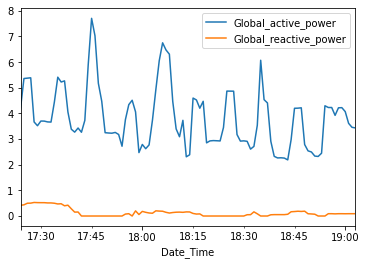

In [99]:
plt.figure(figsize=(30,30))
raw_data.iloc[0:100][['Global_active_power', 'Global_reactive_power']].plot()
# raw_data.iloc[0:100]['Global_active_power'].plot()
plt.show()